In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
def getMeasurement(updateNumber):
    if updateNumber == 1:
      getMeasurement.currentPosition = 0
      getMeasurement.currentVelocity = 60 # m/s

    dt = 0.1

    w = 8 * np.random.randn(1)
    v = 8 * np.random.randn(1)

    z = getMeasurement.currentPosition + getMeasurement.currentVelocity*dt + v
    getMeasurement.currentPosition = z - v
    getMeasurement.currentVelocity = 60 + w
    return [z, getMeasurement.currentPosition, getMeasurement.currentVelocity]

In [3]:
def filter(z, updateNumber):
    dt = 0.1
    # Initialize State
    if updateNumber == 1:
        filter.x = np.array([[0],
                            [20]])
        filter.P = np.array([[5, 0],
                                 [0, 5]])

        filter.A = np.array([[1, dt],
                             [0, 1]])
        filter.H = np.array([[1, 0]])
        filter.HT = np.array([[1],
                              [0]])
        filter.R = 10
        filter.Q = np.array([[1, 0],
                             [0, 3]])

    # Predict State Forward
    x_p = filter.A.dot(filter.x)
    # Predict Covariance Forward
    P_p = filter.A.dot(filter.P).dot(filter.A.T) + filter.Q
    # Compute Kalman Gain
    S = filter.H.dot(P_p).dot(filter.HT) + filter.R
    K = P_p.dot(filter.HT)*(1/S)

    # Estimate State
    residual = z - filter.H.dot(x_p)
    filter.x = x_p + K*residual

    # Estimate Covariance
    filter.P = P_p - K.dot(filter.H).dot(P_p)

    return [filter.x[0], filter.x[1], filter.P];

In [4]:
def testFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)

    measTime = []
    measPos = []
    measDifPos = []
    estDifPos = []
    estPos = []
    estVel = []
    posBound3Sigma = []

    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        # Call Filter and return new State
        f = filter(z[0], k)
        # Save off that state so that it could be plotted
        measTime.append(k)
        measPos.append(z[0])
        measDifPos.append(z[0]-z[1])
        estDifPos.append(f[0]-z[1])
        estPos.append(f[0])
        estVel.append(f[1])
        posVar = f[2]
        posBound3Sigma.append(3*np.sqrt(posVar[0][0]))

    return [measTime, measPos, estPos, estVel, measDifPos, estDifPos, posBound3Sigma];

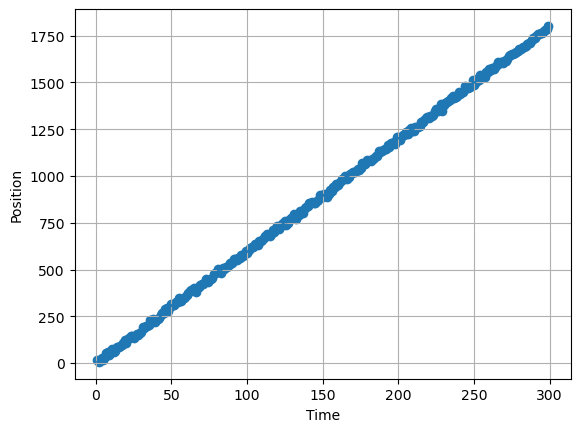

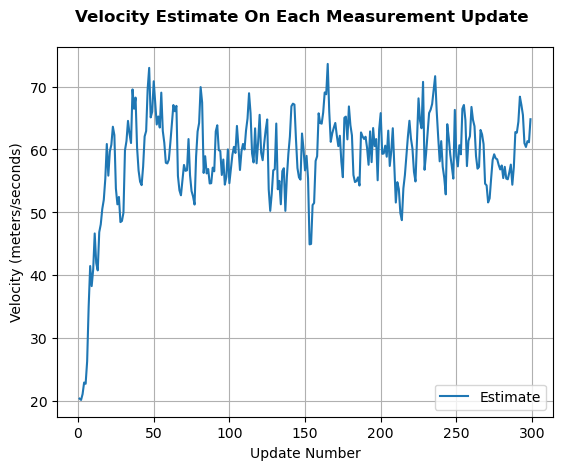

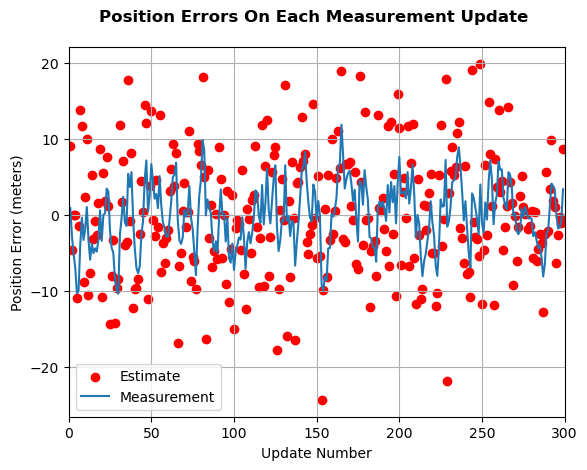

In [5]:
t = testFilter()

plot1 = plt.figure(1)
plt.scatter(t[0], t[1])
plt.plot(t[0], t[2])
plt.ylabel('Position')
plt.xlabel('Time')
plt.grid(True)

plot2 = plt.figure(2)
plt.plot(t[0], t[3])
plt.ylabel('Velocity (meters/seconds)')
plt.xlabel('Update Number')
plt.title('Velocity Estimate On Each Measurement Update \n', fontweight="bold")
plt.legend(['Estimate'])
plt.grid(True)

plot3 = plt.figure(3)
plt.scatter(t[0], t[4], color = 'red')
plt.plot(t[0], t[5])
plt.legend(['Estimate', 'Measurement'])
plt.title('Position Errors On Each Measurement Update \n', fontweight="bold")
#plt.plot(t[0], t[6])
plt.ylabel('Position Error (meters)')
plt.xlabel('Update Number')
plt.grid(True)
plt.xlim([0, 300])
plt.show()